# AICE Professional

1. Tabular 데이터 Brain stroke prediction dataset
- 데이터 출처 : https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset
2. Text 데이터 Twitter Sentiment
- 데이터 출처 : https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
3. Img 데이터 Flower_Classification_5class
- 데이터 출처 : https://www.kaggle.com/datasets/sauravagarwal/flower-classification

# Text 감정 이진 분류(Bert)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import transformers

In [ ]:
text_df = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_train.xlsx', engine='openpyxl')
text_df

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요~,긍정
1,1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램A 화이팅하세요!!,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,부정
...,...,...,...
246,246,영상F서비스로 간편하게 설치!좋아요\n우리 회사화이팅!,긍정
247,247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다! 화이팅 입니다.,긍정
248,248,"사내방송 특성상 최근 이슈화 되거나, 언급이 자주되는 '키워드'를 중심으로 뉴스를 ...",부정
249,249,방송 시간이 너무 길어요.,부정


In [ ]:
text_df.drop('Unnamed: 0', axis=1, inplace=True)
text_df

,data,label
0,재미는 있는데 시간이 짧은게 아쉽네요~,긍정
1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",부정
2,스토리가 너무 딱딱해서 별로였음,부정
3,프로그램A 화이팅하세요!!,긍정
4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,부정
...,...,...
246,영상F서비스로 간편하게 설치!좋아요\n우리 회사화이팅!,긍정
247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다! 화이팅 입니다.,긍정
248,"사내방송 특성상 최근 이슈화 되거나, 언급이 자주되는 '키워드'를 중심으로 뉴스를 ...",부정
249,방송 시간이 너무 길어요.,부정


In [ ]:
text_df.isnull().sum()

,0
data,0
label,0


In [ ]:
text_df.duplicated().sum()

np.int64(0)

In [ ]:
text_df['label'] = np.where(text_df['label']=='긍정',1,0)
text_df

,data,label
0,재미는 있는데 시간이 짧은게 아쉽네요~,1
1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",0
2,스토리가 너무 딱딱해서 별로였음,0
3,프로그램A 화이팅하세요!!,1
4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,0
...,...,...
246,영상F서비스로 간편하게 설치!좋아요\n우리 회사화이팅!,1
247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다! 화이팅 입니다.,1
248,"사내방송 특성상 최근 이슈화 되거나, 언급이 자주되는 '키워드'를 중심으로 뉴스를 ...",0
249,방송 시간이 너무 길어요.,0


In [ ]:
text_df['data']=text_df['data'].str.strip()

In [ ]:
from sklearn.model_selection import train_test_split

feature_txt = text_df['data'].to_list()
label_txt = text_df['label'].to_list()

x_train_txt, x_test_txt, y_train_txt, y_test_txt = train_test_split(feature_txt, label_txt, test_size=0.2, random_state=42, stratify=label_txt)


In [ ]:
from transformers import AutoConfig, BertTokenizer, TFBertForSequenceClassification

In [ ]:
bert_model = 'klue/bert-base'

tokenizer = BertTokenizer.from_pretrained(bert_model)

In [ ]:
train_encodings = tokenizer(x_train_txt, truncation=True, padding=True)
test_encodings = tokenizer(x_test_txt, truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train_txt))
train_dataset = train_dataset.shuffle(1000).batch(16).cache().prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test_txt))
test_dataset = test_dataset.batch(16).cache().prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
config = AutoConfig.from_pretrained(bert_model)
config.num_lables = 2 # 분류할 개수 긍정/부정
config


BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_lables": 2,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.52.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(bert_model, from_pt=True, config=config )

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(train_dataset, validation_data=test_dataset, epochs=10, batch_size=16)

Epoch 1/10
13/13 [==============================] - 50s 570ms/step - loss: 0.5581 - accuracy: 0.7750 - val_loss: 0.3842 - val_accuracy: 0.9412
Epoch 2/10
13/13 [==============================] - 4s 308ms/step - loss: 0.2640 - accuracy: 0.9650 - val_loss: 0.1983 - val_accuracy: 0.9804
Epoch 3/10
13/13 [==============================] - 4s 312ms/step - loss: 0.1291 - accuracy: 0.9750 - val_loss: 0.1209 - val_accuracy: 0.9804
Epoch 4/10
13/13 [==============================] - 4s 308ms/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9804
Epoch 5/10
13/13 [==============================] - 4s 311ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9804
Epoch 6/10
13/13 [==============================] - 4s 314ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0890 - val_accuracy: 0.9804
Epoch 7/10
13/13 [==============================] - 4s 311ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0843 - val_accuracy: 0.9804
Epoch

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 110618882 (421.98 MB)
Trainable params: 110618882 (421.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
text_valid_df = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_test.xlsx', engine='openpyxl')
text_valid_df

,Unnamed: 0,data,label
0,0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,긍정
1,1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,긍정
2,2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,긍정
3,3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,긍정
4,4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,부정
...,...,...,...
96,96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,긍정
97,97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,긍정
98,98,위험한 시설에 대한 설명도 부탁드립니다,부정
99,99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정


In [ ]:
text_df2=text_valid_df.copy()
text_df2

,Unnamed: 0,data,label
0,0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,긍정
1,1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,긍정
2,2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,긍정
3,3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,긍정
4,4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,부정
...,...,...,...
96,96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,긍정
97,97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,긍정
98,98,위험한 시설에 대한 설명도 부탁드립니다,부정
99,99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정


In [ ]:
#drop_col_txt = ['Unnamed: 0', 'label']
drop_col_txt = ['Unnamed: 0']
text_df2.drop(drop_col_txt, axis=1, inplace=True)
text_df2

,data,label
0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,긍정
1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,긍정
2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,긍정
3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,긍정
4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,부정
...,...,...
96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,긍정
97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,긍정
98,위험한 시설에 대한 설명도 부탁드립니다,부정
99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정


In [ ]:
text_df2.isnull().sum()

,0
data,0
label,0


In [ ]:
text_df2.duplicated().sum()

np.int64(0)

In [ ]:
text_df2['data']=text_df2['data'].str.strip()

In [ ]:
text_df2['label'] = np.where(text_df2['label']=='긍정',1,0)
text_df2

,data,label
0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,1
1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,1
2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,1
3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,1
4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,0
...,...,...
96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,1
97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,1
98,위험한 시설에 대한 설명도 부탁드립니다,0
99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,0


In [ ]:
feature_valid = text_df2['data'].to_list()

In [ ]:
valid_encodings = tokenizer(feature_valid, truncation=True, padding=True)

valid_dataset = tf.data.Dataset.from_tensor_slices(dict(valid_encodings))
valid_dataset = valid_dataset.batch(16)


In [ ]:
prediction = model.predict(valid_dataset)
prediction

7/7 [==============================] - 1s 75ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[-2.136783  ,  1.738716  ],
       [-3.0879414 ,  2.4585094 ],
       [-2.8628016 ,  2.3724523 ],
       [-3.0441606 ,  2.3677733 ],
       [ 2.7131248 , -2.2155716 ],
       [-2.9565237 ,  2.4079783 ],
       [-2.95745   ,  2.2963042 ],
       [ 2.906449  , -2.1981018 ],
       [ 2.432741  , -2.0057962 ],
       [ 2.7812846 , -2.1336987 ],
       [ 2.1230419 , -1.7659075 ],
       [-1.1432049 ,  0.4619355 ],
       [ 0.47939724, -0.19270441],
       [-2.9429214 ,  2.4143896 ],
       [-3.0781124 ,  2.5019205 ],
       [ 2.0313082 , -1.7530972 ],
       [-3.079704  ,  2.4592915 ],
       [ 0.8684297 , -0.7953388 ],
       [ 2.5786955 , -1.8661636 ],
       [-2.9298975 ,  2.4608853 ],
       [-3.0972784 ,  2.3675754 ],
       [-2.950009  ,  2.2145405 ],
       [-3.0563    ,  2.378158  ],
       [-3.3018763 ,  2.565868  ],
       [ 2.7943785 , -2.4625828 ],
       [ 2.4455254 , -2.1628168 ],
       [-2.6105735 ,  2.0072076 ],
       [ 2

In [ ]:
y_pred_txt = np.argmax(prediction.logits, axis=1)
y_pred_txt

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(text_df2['label'], y_pred_txt)
accuracy2

0.9603960396039604

In [ ]:
corr_count = sum(text_df2['label']==y_pred_txt)
accuracy = corr_count / len(text_df2)
accuracy

0.9603960396039604

In [ ]:
text_valid_df['pred'] = y_pred_txt
text_valid_df

,Unnamed: 0,data,label,pred
0,0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,긍정,1
1,1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,긍정,1
2,2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,긍정,1
3,3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,긍정,1
4,4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,부정,0
...,...,...,...,...
96,96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,긍정,1
97,97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,긍정,1
98,98,위험한 시설에 대한 설명도 부탁드립니다,부정,0
99,99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정,0


In [ ]:
text_valid_df['pred']= np.where(text_valid_df['pred']==1, "긍정", "부정")
text_valid_df

,Unnamed: 0,data,label,pred
0,0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,긍정,긍정
1,1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,긍정,긍정
2,2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,긍정,긍정
3,3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,긍정,긍정
4,4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,부정,부정
...,...,...,...,...
96,96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,긍정,긍정
97,97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,긍정,긍정
98,98,위험한 시설에 대한 설명도 부탁드립니다,부정,부정
99,99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정,부정


In [ ]:
text_valid_df.rename(columns={'Unnamed; 0':'index', 'data':'텍스트', 'label':'실제 레이블', 'pred':'예측 레이블'} , inplace=True)
text_valid_df

,Unnamed: 0,텍스트,실제 레이블,예측 레이블
0,0,유익한 정보 감사합니다. 취미로 바다에 자주 나가는 편인데 이런 기술이 있는지 몰랐네요.,긍정,긍정
1,1,발빠른 영입 수고 했네요 고객들이 좋아합니다.,긍정,긍정
2,2,프로그램C 주제가 우리의 기술력이 바탕이 된다는점~~..항상 응원합니다,긍정,긍정
3,3,언제나 밝은 미소로 열심히 근무하시는 청원 경찰 분들께 감사드립니다. 항상 건강하시...,긍정,긍정
4,4,안전사고에 대한 개념도 함께 소개 되었으면 더 완벽했을 것 같네요,부정,부정
...,...,...,...,...
96,96,작년에 프로그램A를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다....,긍정,긍정
97,97,프로그램C 잘 보았습니다. 모든일의 바탕은 안전인것 같습니다. 모두를 보호하는 최고...,긍정,긍정
98,98,위험한 시설에 대한 설명도 부탁드립니다,부정,부정
99,99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정,부정


In [ ]:
incorr_text = text_valid_df[text_valid_df['실제 레이블']!=text_valid_df['예측 레이블']]
incorr_text

,Unnamed: 0,텍스트,실제 레이블,예측 레이블
32,32,요즘같이 우울한 시기에는 희망찬 주제로 부탁해요,부정,긍정
53,53,다양한 주제로 기획해주세요,부정,긍정
58,58,주위에 항상 있으나 있는듯 없는듯...중요한지도 고마운지도 모르고 지나치는 산소같은...,긍정,부정
71,71,인터뷰가 대본을 눈으로 보고 읽고있는 것 같아요,부정,긍정


In [ ]:
text_valid_df.to_csv('010123132131.csv', encoding='utf-8', index=False)

In [ ]:
import joblib
joblib.dump(model, '0102131231_2.joblib')

/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


['0102131231_2.joblib']

# AICE Professional-2 Text 분류 모델 만들기_ Version1 (Bert)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import transformers
text_df = pd.read_csv('https://github.com/ohgzone/file1/raw/main/aihub_coupus.csv' )

# xlsx의 경우 text_df = pd.read_excel('https://github.com/ohgzone/file1/raw/main/aihub_coupus.xlsx', engine='openpyxl')


In [ ]:
text_df.isnull().sum()

,0
감정,0
문장,0


In [ ]:
text_df['감정'].value_counts()

,count
감정,
불안,9320
분노,9160
상처,9143
슬픔,9125
당황,8756
기쁨,6126


In [ ]:
text_label = {'불안':0, '분노':1, '상처':2, '슬픔':3, '당황':4, '기쁨':5}
text_df['감정']=text_df['감정'].map(text_label)
text_df

,감정,문장
0,1,일은 왜 해도 해도 끝이 없을까? 화가 난다.
1,1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2,1,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,1,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,1,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.
...,...,...
51625,1,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.
51626,0,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.
51627,2,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.
51628,0,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.


In [ ]:
text_features = text_df.문장.to_list()
text_labels = text_df.감정.to_list()

text_features[:2], text_labels[:2]

(['일은 왜 해도 해도 끝이 없을까? 화가 난다.',
  '이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.'],
 [1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

text_x_train, text_x_valid, text_y_train, text_y_valid = train_test_split(text_features, text_labels, stratify=text_labels, random_state=42, test_size=0.2)

len(text_x_train), len(text_x_valid), len(text_y_train), len(text_y_valid)

(41304, 10326, 41304, 10326)

In [ ]:
text_x_train[:2]

['회사에서 새로 들어온 사원이 계속해서 일을 물어봐. 너무 성가셔.',
 '공장에서 일한 지 벌써 사십 년이 다 돼가는데 고작 무릎질환으로 나를 해고하다니. 허탈해.']

In [ ]:
bert_model = 'klue/bert-base'

In [ ]:
from transformers import AutoConfig, BertTokenizerFast, TFBertForSequenceClassification
tokenizer = BertTokenizerFast.from_pretrained(bert_model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [ ]:
tokenizer.vocab_size

32000

In [ ]:
train_encodings = tokenizer(text_x_train, truncation=True, padding=True)
valid_encodings = tokenizer(text_x_valid, truncation=True, padding=True)

In [ ]:
print(train_encodings['input_ids'][0])

[2, 3769, 27135, 3755, 8182, 6200, 2052, 3851, 6396, 1507, 2069, 9288, 2998, 18, 3760, 18796, 2415, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(valid_encodings['input_ids'][0])

[2, 1299, 2069, 3732, 5012, 2259, 3949, 2170, 2318, 11466, 5012, 7245, 15645, 2138, 1902, 13964, 7261, 732, 2116, 4054, 2170, 8086, 2205, 2318, 859, 2359, 2051, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), text_y_train))
train_dataset = train_dataset.shuffle(1000).batch(16).cache().prefetch(tf.data.experimental.AUTOTUNE)

valid_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encodings), text_y_valid))
valid_dataset = train_dataset.shuffle(1000).batch(16).cache().prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:

#train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), text_y_train))
#train_dataset = train_dataset.shuffle(1000).batch(16).cache().prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": train_encodings["input_ids"],
        "attention_mask": train_encodings["attention_mask"],
        "token_type_ids": train_encodings["token_type_ids"],
    },
    tf.constant(text_y_train, dtype=tf.int32) # <-- 레이블을 tf.constant로 변환
))
train_dataset = train_dataset.shuffle(len(text_y_train)).batch(64).cache().prefetch(tf.data.experimental.AUTOTUNE)


#valid_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encodings), text_y_valid))
#valid_dataset = train_dataset.shuffle(1000).batch(16).cache().prefetch(tf.data.experimental.AUTOTUNE)

valid_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": valid_encodings["input_ids"],
        "attention_mask": valid_encodings["attention_mask"],
        "token_type_ids": valid_encodings["token_type_ids"],
    },
    tf.constant(text_y_valid, dtype=tf.int32) # <-- 레이블을 tf.constant로 변환
))
# 검증 데이터는 일반적으로 셔플하지 않습니다.
valid_dataset = valid_dataset.batch(64).cache().prefetch(tf.data.experimental.AUTOTUNE)



In [ ]:
config = AutoConfig.from_pretrained(bert_model)
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.52.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

In [ ]:
#몇개로 분류할거냐(감정 몇개냐) num_label = 2, 파이토치 학슨된 정보를 tensorflow 로 불러 from_pt=True
model = TFBertForSequenceClassification.from_pretrained(bert_model, num_labels=6, from_pt=True)
from transformers import TFAutoModelForSequenceClassification

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.fit(train_dataset, epochs=10, validation_data=(valid_dataset))


Epoch 1/10
 739/2582 [=======>......................] - ETA: 9:13 - loss: 1.3471 - accuracy: 0.4674

In [ ]:
model.summary()

In [ ]:
text_df5 = pd.read_csv('https://github.com/ohgzone/file1/raw/main/aihub_coupus.csv' )
text_df5 = text_df5.drop('감정')
text_df5

In [ ]:
text_valid5 = text_df5['문장'].to_list()

text_encodings5 = tokenizer(text_valid5, truncation=True, padding=True)

text_valid_dataset5 = tf.data.Dataset.from_tensor_slices((dict(text_encodings5)))
text_valid_dataset5 = text_valid_dataset5.batch(16)

predictions = model.predict(text_valid_dataset5)

In [ ]:
# logits에서 클래스 예측값으로 변환
predicted_labels = np.argmax(predictions.logits, axis=1)

# 실제 레이블 변환
#text_label = {'불안':0, '분노':1, '상처':2, '슬픔':3, '당황':4, '기쁨':5}
label_text = {0:'불안', 1:'분노', 2:'상처', 3:'슬픔', 4:'당황', 5:'기쁨'}
true_labels =text_df5['감정'].map(label_text)


# 정확도 계산
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(true_labels, predicted_labels)
print(f'정확도: {accuracy:.4f}')

# 상세한 분류 보고서 출력
print('\n분류 보고서:')
print(classification_report(true_labels, predicted_labels,
                          target_names=['불안', '분노', '상처', '슬픔', '당황', '기쁨']))





In [ ]:

# Text Test 데이터셋.csv 저장 및 불러와서 확인
text_df5.to_csv('01012345678_2.csv', index=False, encoding='utf-8')
text_df6 = pd.read_csv('01012345678_2.csv')
text_df6

# AICE Professional-2 Text 분류 모델 만들기_ Version2 (ML,DL)

In [ ]:
# Text train 데이터.csv 읽기
# column이 없는 데이터셋이라 header를 None으로 하고 임의로 라벨을 지정해서 사용할 예정입니다.
#text_df = pd.read_csv('twitter_training.csv', header=None)
# 시험에서는 위와 비슷한 명칭으로 데이터를 불러서 사용합니다.

text_df = pd.read_csv('https://raw.githubusercontent.com/suku-7/AICE-Pro-share/refs/heads/main/twitter_training.csv', header=None)
text_df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:

# Text 데이터 전처리 - 감정 분류에 불필요한 데이터셋 제거
text_df = text_df.drop([0, 1], axis=1)

In [ ]:
# Text 데이터 전처리 - column 임의로 지정 label, text
text_df = text_df.rename(columns={2:'label', 3:'text'})
text_df

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [ ]:
# Text 데이터 전처리 - 결측치 확인
text_df.isnull().sum()

,0
label,0
text,686


In [ ]:
# Text 데이터 전처리 - 결측치 확인
text_df = text_df.dropna()

In [ ]:
# Text 데이터 전처리 - 불용어 여부 확인
# '[^a-zA-Z ]' 으로 적으면 소문자, 대문자, 공백 제외 다른 문자나 숫자가 있는지 확인
# '[^가-힣 ]' 으로 적으면 한글, 공백 제외 다른 문자나 숫자가 있는지 확인
# '[^a-zA-Z가-힣 ]' 으로 적으면 영문, 한글, 공백 제외
# [^a-zA-Z가-힣] <- 공백이 없이 만들면 이후 작업에서 띄어쓰기에 필요한 공백을 모두 제거해버려서 문제가 됩니다.

text_df[text_df['text'].str.contains('[^a-zA-Z ]')].head(3)

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [ ]:
# Text 영문자 제외 모두 ''으로 변경
text_df['text'] = text_df['text'].str.replace('[^a-zA-Z ]', '', regex=True)
# Text 문자열의 앞뒤 공백을 제거
text_df['text'] = text_df['text'].str.strip()
# Text 소문자로 변경
text_df['text'] = text_df['text'].str.lower()
# Text 중복 여부 확인 / 6997개 인 것 확인
text_df['text'].duplicated().sum()

<ipython-input-46-4ef7be13015a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.replace('[^a-zA-Z ]', '', regex=True)
<ipython-input-46-4ef7be13015a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.strip()
<ipython-input-46-4ef7be13015a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

np.int64(6997)

In [ ]:
# Text 중복 제거
text_df.drop_duplicates(subset='text', inplace=True)

<ipython-input-47-8fbce50339b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.drop_duplicates(subset='text', inplace=True)


In [ ]:
# Text 중복 제거 확인
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66999 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   66999 non-null  object
 1   text    66999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
# Text 라벨이 어떤 종류가 있는지 확인
text_df['label'].value_counts()

,count
label,
Negative,20455
Positive,18215
Neutral,16519
Irrelevant,11810


In [ ]:
# Text 라벨 인코딩
text_class_to_label = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
text_df['label'] = text_df['label'].map(text_class_to_label)

<ipython-input-50-6d2bea400fac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['label'] = text_df['label'].map(text_class_to_label)


In [ ]:
# Text 라벨 인코딩 제대로 되었는지 확인
text_df['label'].value_counts()

,count
label,
0,20455
1,18215
2,16519
3,11810


In [ ]:
# Text feature, label 분류
text_features = text_df['text']
text_labels = text_df['label']

In [ ]:
# Text train, valid 데이터셋 나누기
text_x_train, text_x_valid, text_y_train, text_y_valid = train_test_split(text_features, text_labels, test_size=0.2, random_state=42, stratify=text_labels)
text_x_train.shape, text_x_valid.shape, text_y_train.shape, text_y_valid.shape

((53599,), (13400,), (53599,), (13400,))

In [ ]:
# Text 분류, TFIDF-머신러닝 모델로 분류하기
# 사용방법이 비교적 단순하고 전처리도 거의 없어서 먼저 해봅니다.
# TF-IDF는 텍스트가 포함된 벡터의 특성에 따라 각 단어의 가중치를 계산하고,
# 그 가중치를 이용해 문서나 텍스트를 분류하거나 회귀 모델에 입력으로 사용합니다.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_x_train_v = tfidf.fit_transform(text_x_train)
text_x_valid_v = tfidf.transform(text_x_valid)

In [ ]:
# Text LogisticRegression 모델 성능 확인
text_lgr = LogisticRegression()
text_lgr.fit(text_x_train_v, text_y_train)
text_lgr.score(text_x_valid_v, text_y_valid)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7642537313432836

In [ ]:
# Text SGDClassifer 모델 성능 확인
text_sgdc = SGDClassifier()
text_sgdc.fit(text_x_train_v, text_y_train)
text_sgdc.score(text_x_valid_v, text_y_valid)

0.7161940298507463

In [ ]:
# Text DecisionTreeClassifier 모델 성능 확인
text_dtc = DecisionTreeClassifier()
text_dtc.fit(text_x_train_v, text_y_train)
text_dtc.score(text_x_valid_v, text_y_valid)

0.7198507462686567

In [ ]:
# Text RandomForestClassifier 모델 성능 확인
text_rfc = RandomForestClassifier()
text_rfc.fit(text_x_train_v, text_y_train)
text_rfc.score(text_x_valid_v, text_y_valid)

0.9085820895522388

In [ ]:
# Text Tokenizer - 딥러닝 분석을 위한 라이브러리 임포트
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Text Tokenizer 작업
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_x_train)

In [ ]:
# Tokenizer에 학습한 단어가 어떤게 있는지 확인용입니다. 작성하지 않아도 괜찮아요.
print(tokenizer.word_index)

In [ ]:
# Tokenizer에 학습한 단어별 빈도 수 확인용입니다. 작성하지 않아도 괜찮아요.
print(tokenizer.word_counts)

In [ ]:
# Tokenizer가 학습한 단어의 개수를 확인합니다.
max_words = len(tokenizer.word_index)
max_words

35958

In [ ]:
# Tokenizer 시퀀스 작업
text_x_train_seq = tokenizer.texts_to_sequences(text_x_train)
text_x_valid_seq = tokenizer.texts_to_sequences(text_x_valid)

In [ ]:
# Tokenizer 시퀀스 작업 후 가장 긴 문장의 단어 개수를 찾습니다.
max(len(i) for i in text_x_train_seq)

166

In [ ]:
# Tokenizer 시퀀스 이후 pad 작업을 하여 가장 긴 문장의 단어수에 맞춰서 공백을 0으로 채워줍니다.
text_x_train_pad = pad_sequences(text_x_train_seq, maxlen=166)
text_x_valid_pad = pad_sequences(text_x_valid_seq, maxlen=166)

In [ ]:
# Text label 갯수 확인용 (4개)
text_labels.value_counts()

,count
label,
0,20455
1,18215
2,16519
3,11810


In [ ]:
# Text 딥러닝 모델
text_model = Sequential()
text_model.add(Embedding(input_dim=max_words+1, output_dim=100, input_length=166))
text_model.add(Bidirectional(LSTM(16, return_sequences=True)))
text_model.add(Dropout(0.3))
text_model.add(Bidirectional(LSTM(16, return_sequences=False)))
text_model.add(Dropout(0.3))
text_model.add(Dense(64, activation='swish'))
text_model.add(BatchNormalization())
text_model.add(Dropout(0.3))
text_model.add(Dense(4, activation='softmax')) # 위에서 수행한 text label 개수

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Text 딥러닝 모델 compile
text_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Text는 es2, mc2, history2 처럼 변수에 2를 붙여서 사용했습니다.
# 같은 코드 안에서 3개의 모델을 만들어서 비슷한 변수명에 숫자나, text, img를 붙였습니다.

es2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
mc2 = ModelCheckpoint('best_text_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

history2 = text_model.fit(
    text_x_train_pad, text_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(text_x_valid_pad, text_y_valid),
    callbacks=[es2, mc2],
    verbose=1
)

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4364 - loss: 1.2234
Epoch 1: val_loss improved from inf to 1.25177, saving model to best_text_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.4376 - loss: 1.2216 - val_accuracy: 0.5882 - val_loss: 1.2518
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8288 - loss: 0.4851
Epoch 2: val_loss improved from 1.25177 to 0.96368, saving model to best_text_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8290 - loss: 0.4846 - val_accuracy: 0.7831 - val_loss: 0.9637
Epoch 3/5
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9267 - loss: 0.2259
Epoch 3: val_loss improved from 0.96368 to 0.57318, saving model to best_text_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9267 - loss: 0.2259 - val_accuracy: 0.8449 - val_loss: 0.5732
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9445 - loss: 0.1625
Epoch 4: val_loss improved from 0.5

In [ ]:
# 위의 Text 모델 성능은 0.873이 나왔네요.
# Text Test 데이터셋.csv 불러오기
# 시험에서는 위와 비슷한 명칭으로 데이터를 불러서 사용합니다.

text_df5 = pd.read_csv('https://raw.githubusercontent.com/suku-7/AICE-Pro-share/refs/heads/main/twitter_validation.csv', header=None)
text_df5

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Text Test 데이터셋 전처리 - 불필요한 column 삭제, 결측치 확인
text_df5 = text_df5.drop([0, 1], axis=1)
text_df5 = text_df5.rename(columns={2:'label', 3:'text'})
text_df5.isnull().sum()

,0
label,0
text,0


In [ ]:
# Text Test 데이터셋 전처리 - 불용어 여부 확인
text_df5[text_df5['text'].str.contains('[^a-zA-Z ]')].head(3)

,label,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...


In [ ]:
# Text Test 데이터셋 불용어 제거
text_df5['text'] = text_df5['text'].str.replace('[^a-zA-Z ]', '', regex=True)
# Text Test 데이터셋 앞뒤에 공백 제거
text_df5['text'] = text_df5['text'].str.strip()
# Text Test 데이터셋 소문자로 변경
text_df5['text'] = text_df5['text'].str.lower()
# Text Test 데이터셋 중복 여부, 갯수 확인
text_df5['text'].duplicated().sum()

# Train Data와 다르게 Test 데이터셋은 중복이 있어도 지우지 않았습니다.

np.int64(3)

In [ ]:
# Text Test 데이터셋 라벨 종류, 갯수 확인
text_df5['label'].value_counts()

,count
label,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


In [ ]:
# Text Test 데이터셋 라벨 인코딩, 제대로 되었는지 확인 (Train 데이터셋하고 동일하게)
text_class_to_label = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
text_df5['label'] = text_df5['label'].map(text_class_to_label)
text_df5['label'].value_counts()

,count
label,
2,285
1,277
0,266
3,172


In [ ]:
# Text Test 데이터셋 feature, label 분류
text_x_test = text_df5['text']
text_y_test = text_df5['label']
# Text Test 데이터 모델 성능 확인을 위해 데이터 전처리, Tfidf, Tokenizer
text_x_test_v = tfidf.transform(text_x_test)
text_x_test_seq = tokenizer.texts_to_sequences(text_x_test)
text_x_test_pad = pad_sequences(text_x_test_seq)

In [ ]:
# Text Test 데이터셋 모델로 예측하기.
text_rfc_y_pred = text_rfc.predict(text_x_test_v)
text_model_y_pred = text_model.predict(text_x_test_pad)
text_model_y_pred = np.argmax(text_model_y_pred, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


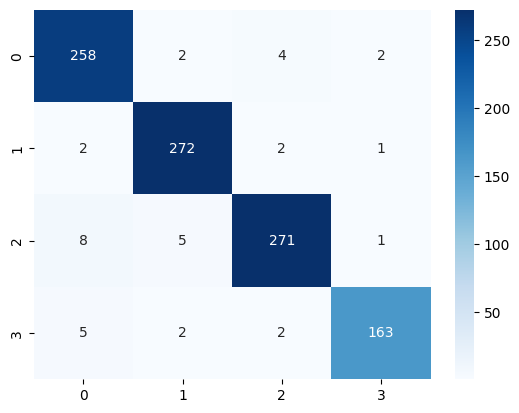

In [ ]:
# Text Test 데이터셋에 label이 있어서 예측한 것과 비교용으로 시각화 하였습니다.
# 시험에서는 label이 없기 때문에 확인할 수 없습니다.
# Text RandomForestClassifier 모델
text_cm = confusion_matrix(text_y_test, text_rfc_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()

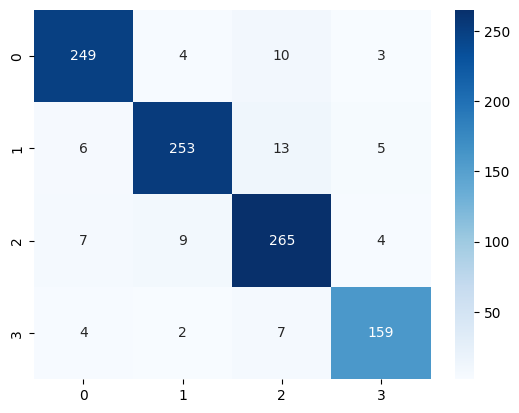

In [ ]:
# Text 딥러닝 모델
text_cm = confusion_matrix(text_y_test, text_model_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
# Text RandomForestClassifier는 훈련 데이터셋 기준 0.908
# Text 딥러닝은 훈련 데이터셋 기준 0.873이 나와서 RandomForest 모델을 선택했습니다.
# Text 데이터 라벨이 4개인 분류인데 96% 성능이면 꽤 좋은거 같습니다.
# 위에서도 말씀드렸지만, Test Dataset에 라벨이 있기 때문에 예측값과 비교한 부분입니다.
# 시험에서는 불필요한 부분입니다.

text_df5['pred'] = text_rfc_y_pred
text_correct_count = sum(text_df5['label']==text_df5['pred'])
text_total_count = len(text_df5)
text_model_accuracy = text_correct_count/text_total_count
print(f'text_model_accuracy : {text_model_accuracy:.2f}')

text_model_accuracy : 0.96


In [ ]:
# Text dataset에 예측한 값을 csv에 추가
text_df5['pred'] = text_rfc_y_pred
text_df5

,label,text,pred
0,3,i mentioned on facebook that i was struggling ...,3
1,2,bbc news amazon boss jeff bezos rejects claim...,2
2,0,microsoft why do i pay for word when it functi...,0
3,0,csgo matchmaking is so full of closet hacking ...,0
4,2,now the president is slapping americans in the...,2
...,...,...,...
995,3,toronto is the arts and culture capital of can...,3
996,3,this is actually a good move tot bring more vi...,3
997,1,today sucked so its time to drink wine n play ...,1
998,1,bought a fraction of microsoft today small wins,1


In [ ]:
# Text dataset 라벨 인코딩 했던 것 원상태로
text_label_to_class = {0:'Negative', 1:'Positive', 2:'Neutral', 3:'Irrelevant'}
text_df5['label'] = text_df5['label'].map(text_label_to_class)
text_df5['pred'] = text_df5['pred'].map(text_label_to_class)
text_df5

,label,text,pred
0,Irrelevant,i mentioned on facebook that i was struggling ...,Irrelevant
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,Neutral
2,Negative,microsoft why do i pay for word when it functi...,Negative
3,Negative,csgo matchmaking is so full of closet hacking ...,Negative
4,Neutral,now the president is slapping americans in the...,Neutral
...,...,...,...
995,Irrelevant,toronto is the arts and culture capital of can...,Irrelevant
996,Irrelevant,this is actually a good move tot bring more vi...,Irrelevant
997,Positive,today sucked so its time to drink wine n play ...,Positive
998,Positive,bought a fraction of microsoft today small wins,Positive


In [ ]:
# Text Test 데이터셋.csv 저장 및 불러와서 확인
text_df5.to_csv('01012345678_2.csv', index=False, encoding='utf-8')
text_df6 = pd.read_csv('01012345678_2.csv')
text_df6

,label,text,pred
0,Irrelevant,i mentioned on facebook that i was struggling ...,Irrelevant
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,Neutral
2,Negative,microsoft why do i pay for word when it functi...,Negative
3,Negative,csgo matchmaking is so full of closet hacking ...,Negative
4,Neutral,now the president is slapping americans in the...,Neutral
...,...,...,...
995,Irrelevant,toronto is the arts and culture capital of can...,Irrelevant
996,Irrelevant,this is actually a good move tot bring more vi...,Irrelevant
997,Positive,today sucked so its time to drink wine n play ...,Positive
998,Positive,bought a fraction of microsoft today small wins,Positive


In [ ]:
# Text RandomForestClassifier 모델 저장
joblib.dump(text_rfc, '01012345678_2.joblib')

['01012345678_2.joblib']

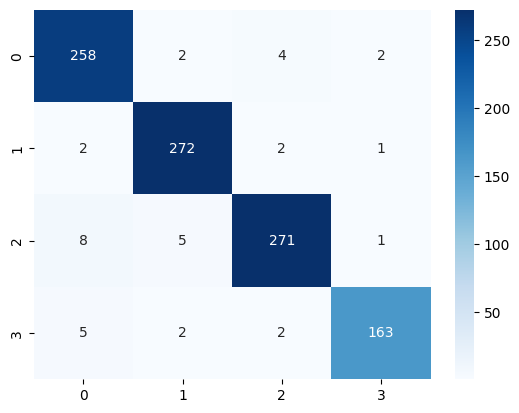

In [ ]:
# Text 모델 저장 잘 되었는지 불러와서 성능 확인
text_load_model = joblib.load('01012345678_2.joblib')
text_load_y_pred = text_load_model.predict(text_x_test_v)
text_cm = confusion_matrix(text_y_test, text_load_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()